In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lidando com o DataFrame

In [194]:
df = pd.read_csv('/content/drive/MyDrive/Programação/Curso analise de dados do FreeCodeCamp/medical_examination.csv')

In [195]:
df['overweight'] = df['weight'] / (df['height'] / 100)**2

In [196]:
df.loc[df['overweight'] <= 25, 'overweight'] = 0
df.loc[df['overweight'] > 25, 'overweight'] = 1

In [197]:
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1

In [198]:
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

## Construindo um gráfico de barras

In [199]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat = df_cat.sort_values(by='variable')

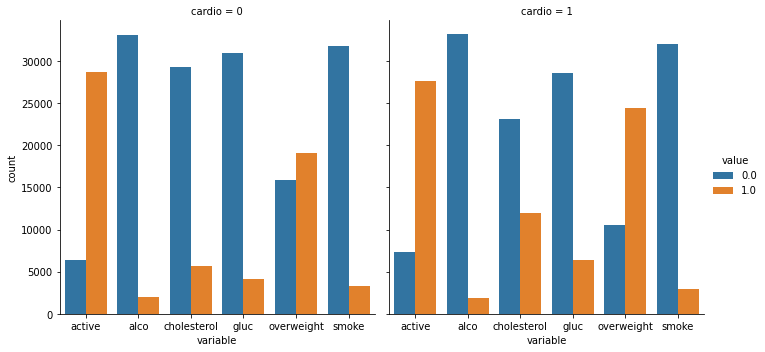

In [200]:
sns.catplot(x='variable', col='cardio', hue='value', kind='count', data=df_cat)
plt.show()

## Limpando dados

In [201]:
df_heat = df[df['ap_hi'] >= df['ap_lo']]

In [202]:
df_heat = df_heat[df_heat['height'] >= df['height'].quantile(0.025)]

In [203]:
df_heat = df_heat[df_heat['height'] <= df['height'].quantile(0.975)]

In [204]:
df_heat = df_heat[df_heat['weight'] >= df['weight'].quantile(0.025)]

In [205]:
df_heat = df_heat[df_heat['weight'] <= df['weight'].quantile(0.975)]

## Construindo um gráfico de calor

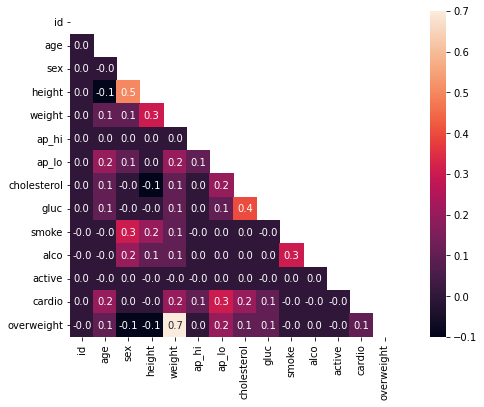

In [206]:
plt.figure(figsize=(12, 6))
mask = np.triu(np.ones_like(df_heat.corr(), dtype = bool))
sns.heatmap(data=df_heat.corr().round(1), mask=mask, annot=True, square=True, fmt=".1f")
plt.show()